# Data Preparation

### 📘 Dataset Column Descriptions

| Column | Description |
|--------|--------------|
| **customerID** | Unique ID assigned to each customer. |
| **gender** | Whether the customer is male or female. |
| **SeniorCitizen** | Indicates if the customer is a senior (1 = Yes, 0 = No). |
| **Partner** | Whether the customer has a partner (Yes/No). |
| **Dependents** | Whether the customer has dependents (Yes/No). |
| **tenure** | Number of months the customer has stayed with the company. |
| **PhoneService** | Whether the customer has a phone service (Yes/No). |
| **MultipleLines** | Indicates if the customer has multiple phone lines. |
| **InternetService** | Type of internet service: DSL, Fiber optic, or No. |
| **OnlineSecurity** | Whether the customer has online security service. |
| **OnlineBackup** | Whether the customer has online backup service. |
| **DeviceProtection** | Whether the customer has a device protection plan. |
| **TechSupport** | Whether the customer has technical support service. |
| **StreamingTV** | Whether the customer has a streaming TV service. |
| **StreamingMovies** | Whether the customer has a streaming movies service. |
| **Contract** | Type of contract: Month-to-month, One year, or Two year. |
| **PaperlessBilling** | Whether the customer uses paperless billing (Yes/No). |
| **PaymentMethod** | Customer’s payment method (e.g., credit card, bank transfer). |
| **MonthlyCharges** | Amount charged to the customer each month. |
| **TotalCharges** | Total amount charged to the customer over their tenure. |
| **Churn** | Whether the customer left the company (Yes/No)*Churn** | Whether the c


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
empty_cols = (df == ' ').any()
print("Columns with empty strings:", list(empty_cols[empty_cols].index))

Columns with empty strings: ['TotalCharges']


In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)
print(df['TotalCharges'].dtypes)

float64


In [9]:
df['TotalCharges'].isnull().sum()

11

In [10]:
# 1. Value counts for all non-numeric columns
print("Value Counts for Non-Numeric Columns:")
for col in df.select_dtypes(exclude=['number']).columns:
    if col == "customerID" or col == "TotalCharges":
        continue
        
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("-" * 40)



Value Counts for Non-Numeric Columns:

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: co

In [11]:
if 'customerID' in df.columns:
    unique_ids = df['customerID'].is_unique
    total_ids = df['customerID'].nunique()
    print(f"\nID Column Check:")
    print(f" - Total Rows: {len(df)}")
    print(f" - Unique IDs: {total_ids}")
    print(f" - All IDs Unique? {'Yes' if unique_ids else 'No'}")
else:
    print("\nNo 'id' column found in dataset.")



ID Column Check:
 - Total Rows: 7043
 - Unique IDs: 7043
 - All IDs Unique? Yes


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Handling missing values

In [14]:
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)

In [15]:
df['TotalCharges'].isnull().sum()

0

## Data preprocessing and Categorical variable encoding

In [18]:
preprocessed_df = df.copy()

In [19]:
preprocessed_df.drop('customerID', axis=1, inplace=True)

In [22]:
le = LabelEncoder()
for col in preprocessed_df.select_dtypes(include=['object']).columns:
    preprocessed_df[col] = le.fit_transform(preprocessed_df[col])

In [26]:
scaler = StandardScaler()
numeric_cols = preprocessed_df.select_dtypes(include=['int64', 'float64']).columns
preprocessed_df[numeric_cols] = scaler.fit_transform(preprocessed_df[numeric_cols])

In [28]:
preprocessed_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,-0.439916,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,-0.439916,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,-0.439916,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,-0.439916,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,-0.439916,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,-0.439916,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.127605,0
7039,0,-0.439916,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.242606,0
7040,0,-0.439916,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.852932,0
7041,1,2.273159,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.870513,1


## Dataset splitting.

In [39]:
X = preprocessed_df.drop('Churn', axis=1)
y = preprocessed_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% for testing
    random_state=42,     # reproducibility
    stratify=y           # keep same class ratio in both sets
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 19)
Testing set shape: (1409, 19)


In [41]:
preprocessed_df.to_csv('preprocessed_data.csv', index=False)

# Exploratory Data Analysis (EDA)

## Overall churn rate (Yes vs No)

In [47]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

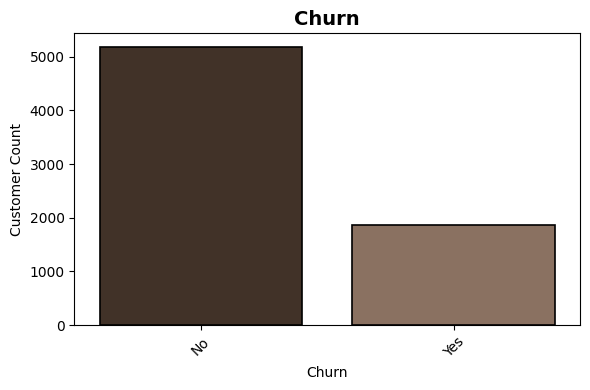

In [285]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='Churn',
    data=df,
    palette=['#453124', '#916f5a']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn")
plt.xticks(rotation=45) 
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


## Gender, Senior Citizen, Partner, Dependents distribution

In [59]:
pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


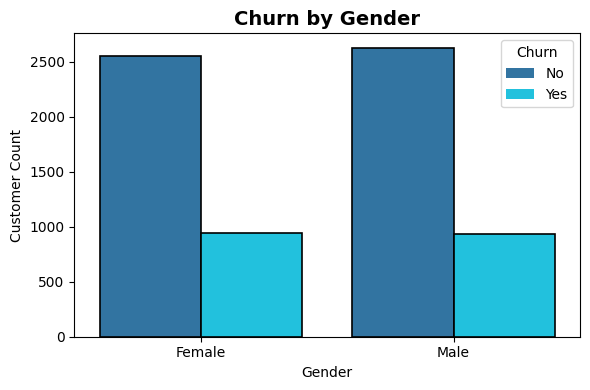

In [187]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='gender',
    hue='Churn',
    data=df,
    palette=['#1f77b4', '#03d7fc']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [165]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


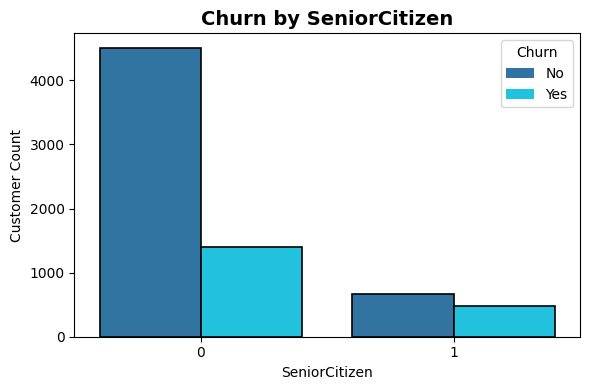

In [211]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='SeniorCitizen',
    hue='Churn',
    data=df,
    palette=['#1f77b4', '#03d7fc']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by SeniorCitizen", fontsize=14, fontweight='bold')
plt.xlabel("SeniorCitizen")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [193]:
pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


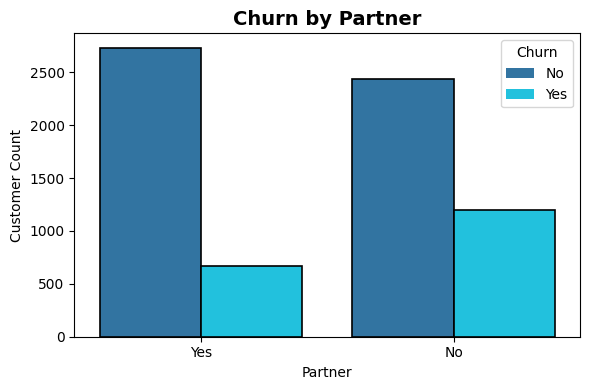

In [195]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='Partner',
    hue='Churn',
    data=df,
    palette=['#1f77b4', '#03d7fc']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Partner", fontsize=14, fontweight='bold')
plt.xlabel("Partner")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [65]:
pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


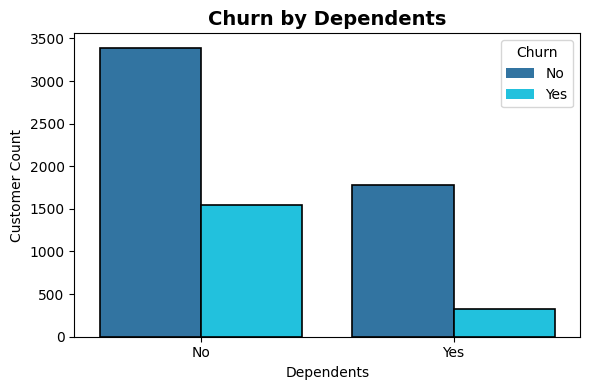

In [197]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='Dependents',
    hue='Churn',
    data=df,
    palette=['#1f77b4', '#03d7fc']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Dependents", fontsize=14, fontweight='bold')
plt.xlabel("Dependents")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


## Tenure distribution and relation to churn

In [71]:
df.groupby('Churn')['tenure'].agg(['mean', 'min', 'max']).reset_index()


,Churn,mean,min,max
0,No,37.569965,0,72
1,Yes,17.979133,1,72


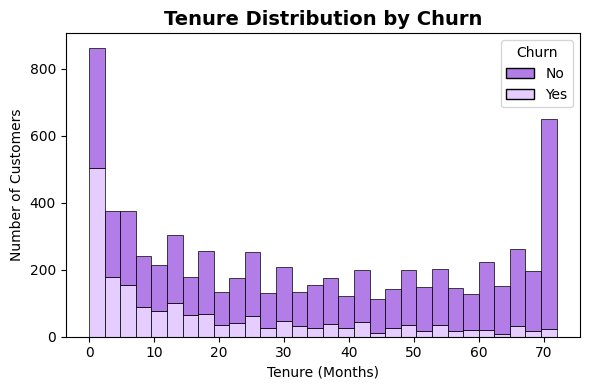

In [209]:
plt.figure(figsize=(6,4))

ax = sns.histplot(
    x='tenure',
    hue='Churn',
    data=df,
    palette=['#9852de', '#debdff'],
    multiple='stack',
    bins=30
)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Labels and title
plt.title("Tenure Distribution by Churn", fontsize=14, fontweight='bold')
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")

plt.tight_layout()
plt.show()


## Service-Based Analysis

In [77]:
pd.crosstab(df['Contract'], df['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


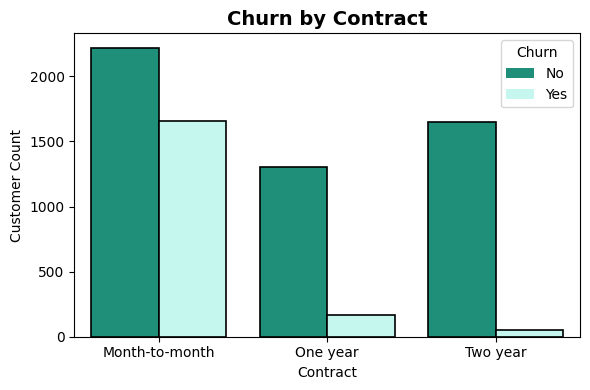

In [213]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='Contract',
    hue='Churn',
    data=df,
    palette=['#0ea186', '#bdfff3']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Contract", fontsize=14, fontweight='bold')
plt.xlabel("Contract")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [ ]:
pd.crosstab(df['PaymentMethod'], df['Churn'])

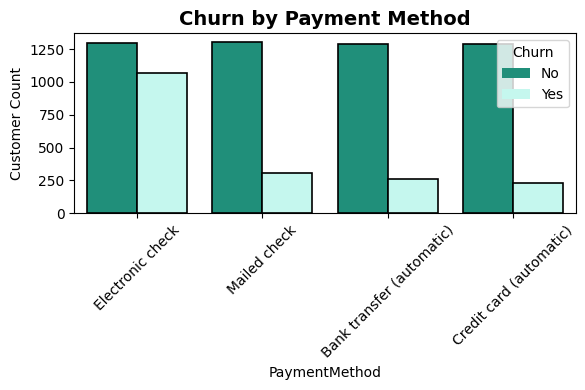

In [221]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='PaymentMethod',
    hue='Churn',
    data=df,
    palette=['#0ea186', '#bdfff3']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("PaymentMethod")
plt.xticks(rotation=45) 
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [215]:
pd.crosstab(df['PaperlessBilling'], df['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


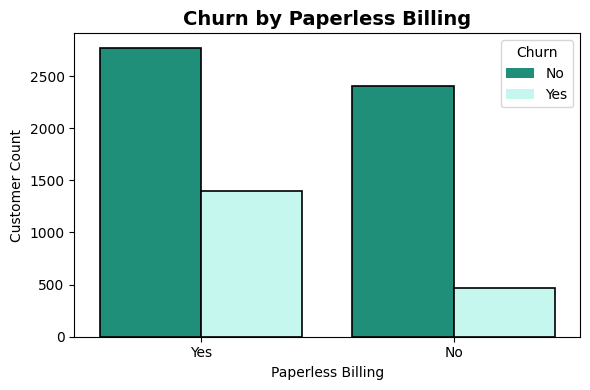

In [217]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='PaperlessBilling',
    hue='Churn',
    data=df,
    palette=['#0ea186', '#bdfff3']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Paperless Billing", fontsize=14, fontweight='bold')
plt.xlabel("Paperless Billing")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


## Financial Behavior Analysis

In this section, we explore how **financial factors** such as `MonthlyCharges` and `TotalCharges` affect customer churn.

### Visualization Techniques:

- **Boxplots**  
  Show the distribution of charges across churn groups, including the **median**, **quartiles**, and **spread**.  
  These plots help identify differences in variability and outliers between customers who churned and those who didn’t.

- **KDE Plots (Kernel Density Estimate):**  
  Display smooth probability curves to compare the **shape and shift** of charge distributions between churned and retained customers.  
  They provide a clearer view of overlap or separation between the two groups.

- **Histograms:**  
  Represent the distribution of a **single variable** (e.g., `MonthlyCharges`) to understand how values are spread across all customers.

### Objective:
Identify how financial behavior — such as higher monthly costs or total charges — correlates with churn.


In [105]:
df.groupby('Churn')['MonthlyCharges'].agg(['mean', 'min','median', 'max']).reset_index()

,Churn,mean,min,median,max
0,No,61.265124,18.25,64.425,118.75
1,Yes,74.441332,18.85,79.650,118.35


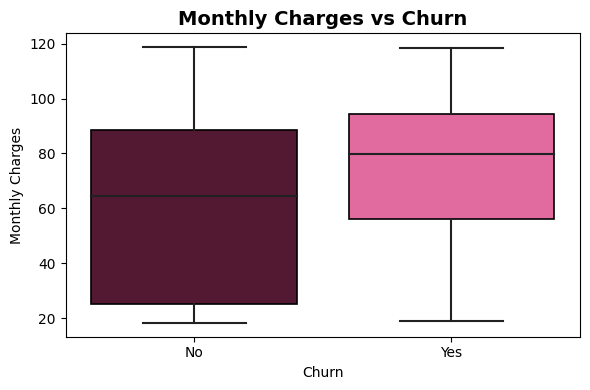

In [289]:
plt.figure(figsize=(6,4))

# Create boxplot with custom palette
ax = sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    data=df,
    palette=['#5e0f31', '#f5569b']
)

# Add black border around each box
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Optional styling
plt.title("Monthly Charges vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.tight_layout()

plt.show()


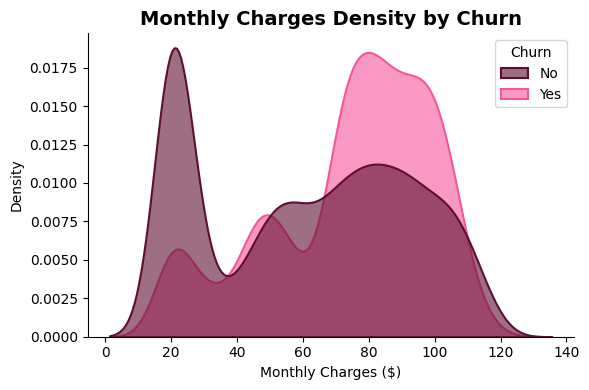

In [261]:
plt.figure(figsize=(6,4))

sns.kdeplot(
    data=df,
    x='MonthlyCharges',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#5e0f31', '#f5569b'],
    alpha=0.6,
    linewidth=1.5
)

# Titles and labels
plt.title("Monthly Charges Density by Churn", fontsize=14, fontweight='bold')
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Density")

# Optional styling
sns.despine(left=False, bottom=False)
plt.tight_layout()

plt.show()



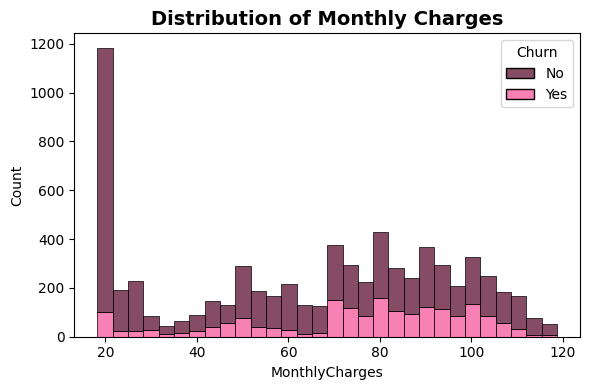

In [263]:
plt.figure(figsize=(6,4))

ax = sns.histplot(
    x='MonthlyCharges',
    hue='Churn',
    data=df,
    palette=['#5e0f31', '#f5569b'],
    multiple='stack',
    bins=30
)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Labels and title
plt.title("Distribution of Monthly Charges", fontsize=14, fontweight='bold')
plt.xlabel("MonthlyCharges")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [103]:
df.groupby('Churn')['TotalCharges'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()

,Churn,count,mean,median,min,max
0,No,5174,2549.911442,1679.525,0.00,8672.45
1,Yes,1869,1531.796094,703.550,18.85,8684.80


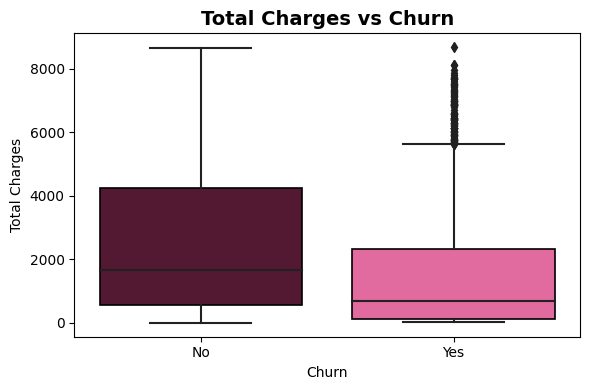

In [291]:
plt.figure(figsize=(6,4))

# Create boxplot with custom palette
ax = sns.boxplot(
    x='Churn',
    y='TotalCharges',
    data=df,
    palette=['#5e0f31', '#f5569b']
)

# Add black border around each box
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Optional styling
plt.title("Total Charges vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.tight_layout()

plt.show()


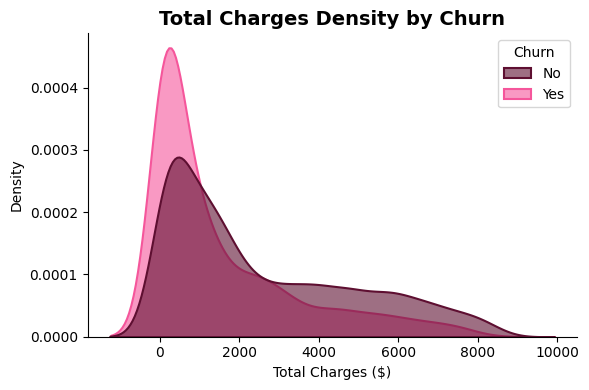

In [253]:
plt.figure(figsize=(6,4))

sns.kdeplot(
    data=df,
    x='TotalCharges',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#5e0f31', '#f5569b'],
    alpha=0.6,
    linewidth=1.5
)

# Titles and labels
plt.title("Total Charges Density by Churn", fontsize=14, fontweight='bold')
plt.xlabel("Total Charges ($)")
plt.ylabel("Density")

# Optional styling
sns.despine(left=False, bottom=False)
plt.tight_layout()

plt.show()


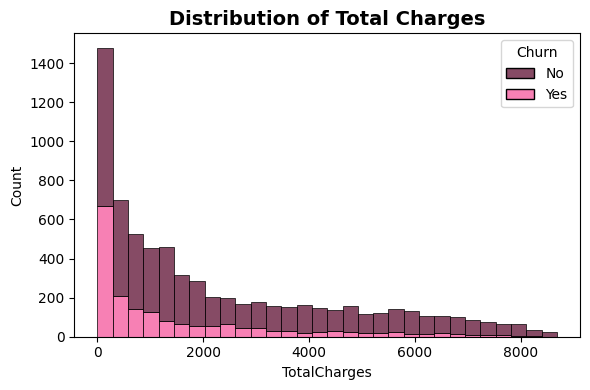

In [265]:
plt.figure(figsize=(6,4))

ax = sns.histplot(
    x='TotalCharges',
    hue='Churn',
    data=df,
    palette=['#5e0f31', '#f5569b'],
    multiple='stack',
    bins=30
)

for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(0.5)

# Labels and title
plt.title("Distribution of Total Charges", fontsize=14, fontweight='bold')
plt.xlabel("TotalCharges")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Service-Based Analysis

This section examines how different subscribed services affect customer churn.  
It includes features such as InternetService, OnlineSecurity, TechSupport, StreamingTV, and others.  

A new column, **TotalServices**, was created to count the number of services each customer has.  
This helps analyze the relationship between the number of services and churn behavior.


In [122]:
pd.crosstab(df['InternetService'], df['Churn'], margins=True)

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


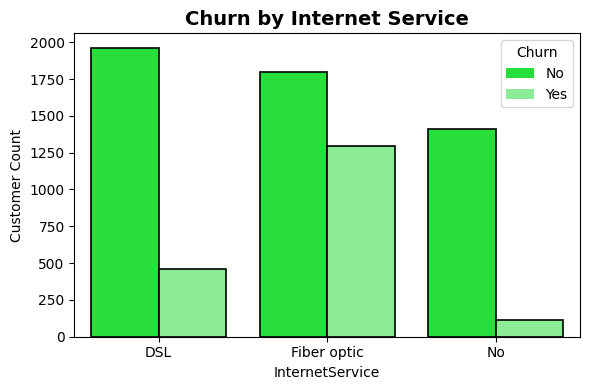

In [267]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='InternetService',
    hue='Churn',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Internet Service", fontsize=14, fontweight='bold')
plt.xlabel("InternetService")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [134]:
pd.crosstab(df['OnlineSecurity'], df['Churn'], margins=True)

Churn,No,Yes,All
OnlineSecurity,,,
No,2037,1461,3498
No internet service,1413,113,1526
Yes,1724,295,2019
All,5174,1869,7043


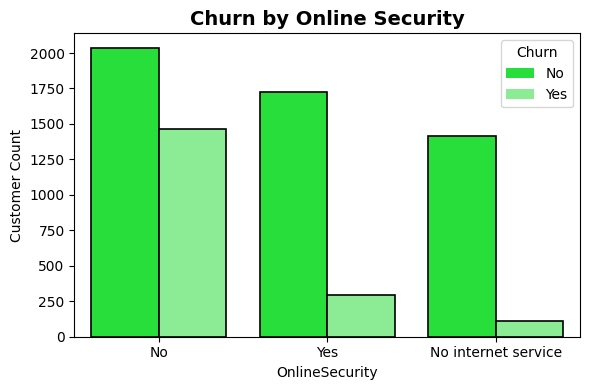

In [269]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='OnlineSecurity',
    hue='Churn',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Online Security", fontsize=14, fontweight='bold')
plt.xlabel("OnlineSecurity")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [130]:
pd.crosstab(df['TechSupport'], df['Churn'], margins=True)

Churn,No,Yes,All
TechSupport,,,
No,2027,1446,3473
No internet service,1413,113,1526
Yes,1734,310,2044
All,5174,1869,7043


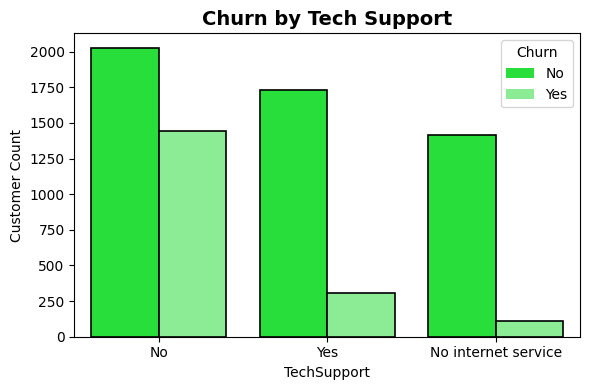

In [271]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='TechSupport',
    hue='Churn',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by Tech Support", fontsize=14, fontweight='bold')
plt.xlabel("TechSupport")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [279]:
pd.crosstab(df['StreamingTV'], df['Churn'], margins=True)

Churn,No,Yes,All
StreamingTV,,,
No,1868,942,2810
No internet service,1413,113,1526
Yes,1893,814,2707
All,5174,1869,7043


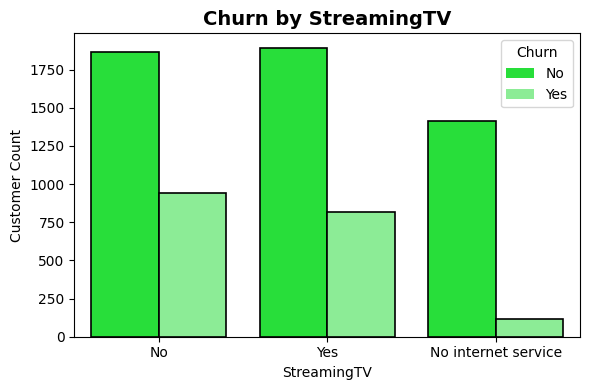

In [273]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='StreamingTV',
    hue='Churn',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by StreamingTV", fontsize=14, fontweight='bold')
plt.xlabel("StreamingTV")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [281]:
pd.crosstab(df['PhoneService'], df['Churn'], margins=True)

Churn,No,Yes,All
PhoneService,,,
No,512,170,682
Yes,4662,1699,6361
All,5174,1869,7043


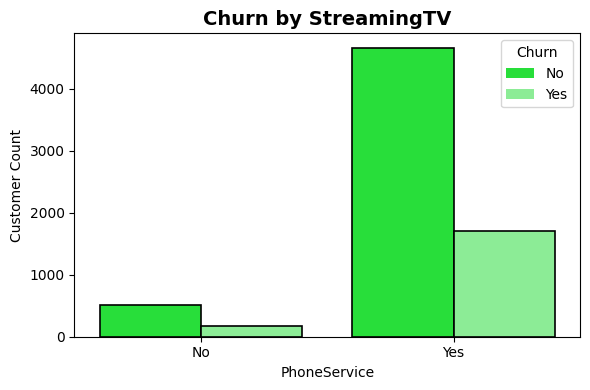

In [275]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x='PhoneService',
    hue='Churn',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

for patch in ax.patches:
    patch.set_edgecolor('black')   
    patch.set_linewidth(1.2)       

# Optional styling
plt.title("Churn by StreamingTV", fontsize=14, fontweight='bold')
plt.xlabel("PhoneService")
plt.ylabel("Customer Count")
plt.tight_layout()

plt.show()


In [142]:
service_cols = ['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

df['TotalServices'] = df[service_cols].apply(lambda x: (x == 'Yes').sum(), axis=1)

In [154]:
pd.crosstab( df['Churn'],df['TotalServices'],margins=True)

TotalServices,0,1,2,3,4,5,6,7,8,All
Churn,,,,,,,,,,
No,45,1342,798,613,633,676,524,346,197,5174
Yes,35,359,390,352,289,232,152,49,11,1869
All,80,1701,1188,965,922,908,676,395,208,7043


In [146]:
df.groupby('Churn')['TotalServices'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index()

,Churn,count,mean,median,min,max
0,No,5174,3.446270,3.0,0,8
1,Yes,1869,3.132156,3.0,0,8


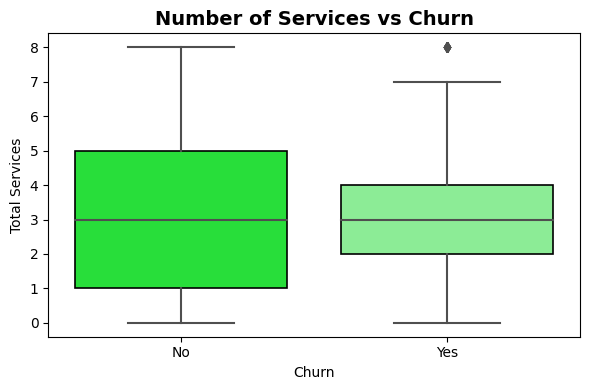

In [277]:
plt.figure(figsize=(6,4))

# Create boxplot with custom palette
ax = sns.boxplot(
    x='Churn',
    y='TotalServices',
    data=df,
    palette=['#0afc22', '#7cfc89']
)

# Add black border around each box
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)

# Optional styling
plt.title("Number of Services vs Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn")
plt.ylabel("Total Services")
plt.tight_layout()

plt.show()


## Conclusion

The analysis of the Telco Customer Churn dataset reveals several important insights:

- Gender had **no significant difference** in churn rate.  
- **Senior citizens** exhibited a higher churn rate — older customers are more likely to leave.  
- Customers with **partners or dependents** were less likely to churn, suggesting higher stability.  
- The **average tenure** for churned customers was much shorter (~18 months vs. 37 months for non-churned).  
- Most churned customers left **within the first year** of service.  
- Customers who churned tended to have **higher MonthlyCharges**.  
- Those with **Fiber Optic internet** and **Streaming services** showed higher churn tendencies.  
- Customers with **more subscribed services (6–8)** had significantly **lower churn rates**.  
- **Month-to-Month contracts** experienced the highest churn, while **One- and Two-Year contracts** reduced churn drastically.  

**Overall Churn Rate:**  
Approximately **26.5% of customers churned**, while **73.5% remained** with the company.  

These insights highlight that **contract length, service bundles, and tenure duration** are key factors influencing customer retention.
